In [1]:
import numpy as np
from keras import datasets
from keras.utils import np_utils

num_classes = 10
img_height = 32
img_width = 32

(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

x_train = x_train.astype(np.float32) / 255
x_test = x_test.astype(np.float32) / 255

y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

x_val = x_test[:5000, ...]
x_test = x_test[5000:, ...]
y_val = y_test[:5000, ...]
y_test = y_test[5000:, ...]

print('x_train shape:', x_train.shape)
print('x_val shape:', x_val.shape)
print('x_test shape:', x_test.shape)


/home/cluster/Documents/mena-keras/env/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


x_train shape: (50000, 32, 32, 3)
x_val shape: (5000, 32, 32, 3)
x_test shape: (5000, 32, 32, 3)


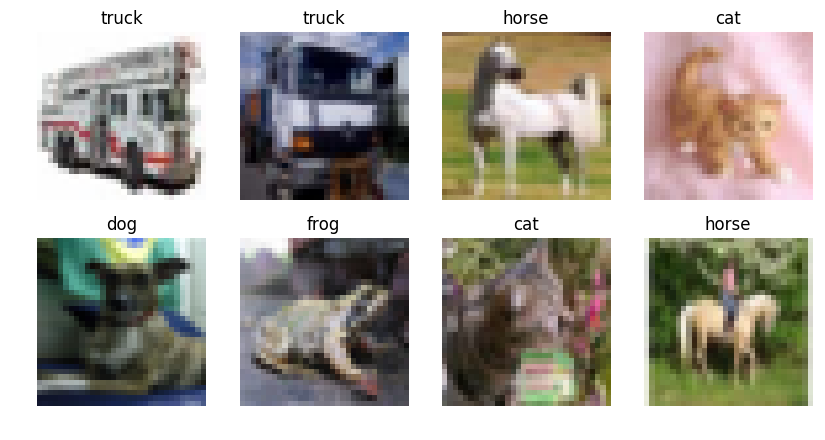

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
           'dog', 'frog', 'horse', 'ship', 'truck']

img_count = 1
plt.figure(figsize=(10, 5), dpi=100)
for i in range(2):
    for j in range(4):
        idx = np.random.randint(0, x_train.shape[0])
        plt.subplot(2, 4, img_count)
        plt.imshow(np.squeeze(x_train[idx, ...]))
        plt.title(classes[np.argmax(y_train[idx, ...])])
        plt.axis('off')
        img_count += 1

In [5]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu', name='conv1_1',
                        input_shape=(img_height, img_width, 3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu', name='conv1_2'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), name='max_pool1'))

model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu', name='conv2_1'))
model.add(layers.Conv2D(64, (3, 3), activation='relu', name='conv2_2'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), name='max_pool2'))

model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu', name='conv3_1'))
model.add(layers.Conv2D(128, (3, 3), activation='relu', name='conv3_2'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), name='max_pool3'))

model.add(layers.Flatten(name='flatten'))
model.add(layers.Dense(512, activation='relu', name='fc3'))
model.add(layers.Dense(num_classes, activation='softmax', name='fc4'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1_1 (Conv2D)             (None, 32, 32, 32)        896       
_________________________________________________________________
conv1_2 (Conv2D)             (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pool1 (MaxPooling2D)     (None, 15, 15, 32)        0         
_________________________________________________________________
conv2_1 (Conv2D)             (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2_2 (Conv2D)             (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pool2 (MaxPooling2D)     (None, 6, 6, 64)          0         
_________________________________________________________________
conv3_1 (Conv2D)             (None, 6, 6, 128)         73856     
__________

In [9]:
batch_size = 32
epochs = 50

model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy'])

history = model.fit(x_train, y_train, 
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(x_val, y_val))

Train on 50000 samples, validate on 5000 samples
Epoch 1/50
50000/50000 [==============================] - 11s 211us/step - loss: 0.2148 - acc: 0.9271 - val_loss: 1.1410 - val_acc: 0.7522
Epoch 2/50
50000/50000 [==============================] - 11s 215us/step - loss: 0.1893 - acc: 0.9353 - val_loss: 1.2310 - val_acc: 0.7458
Epoch 3/50
50000/50000 [==============================] - 11s 214us/step - loss: 0.1906 - acc: 0.9346 - val_loss: 1.2687 - val_acc: 0.7414
Epoch 4/50
50000/50000 [==============================] - 11s 213us/step - loss: 0.1819 - acc: 0.9384 - val_loss: 1.2432 - val_acc: 0.7442
Epoch 5/50
50000/50000 [==============================] - 11s 213us/step - loss: 0.1845 - acc: 0.9377 - val_loss: 1.2801 - val_acc: 0.7448
Epoch 6/50
50000/50000 [==============================] - 10s 209us/step - loss: 0.1764 - acc: 0.9405 - val_loss: 1.2344 - val_acc: 0.7502
Epoch 7/50
50000/50000 [==============================] - 10s 209us/step - loss: 0.1743 - acc: 0.9419 - val_loss: 1.3

In [7]:
def plot_history(history):
    scores = history.history

    plt.figure(figsize=(10, 5), dpi=100)
    plt.subplots_adjust(wspace=0.5)

    plt.subplot(1, 2, 1)
    plt.title('Loss history')
    plt.plot(scores['loss'], 'b-', label='Training loss')
    plt.plot(scores['val_loss'], 'r-', label='Validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.grid()
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.title('Accuracy history')
    plt.plot(scores['acc'], 'b-', label='Training accuracy')
    plt.plot(scores['val_acc'], 'r-', label='Validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.grid()
    plt.legend()

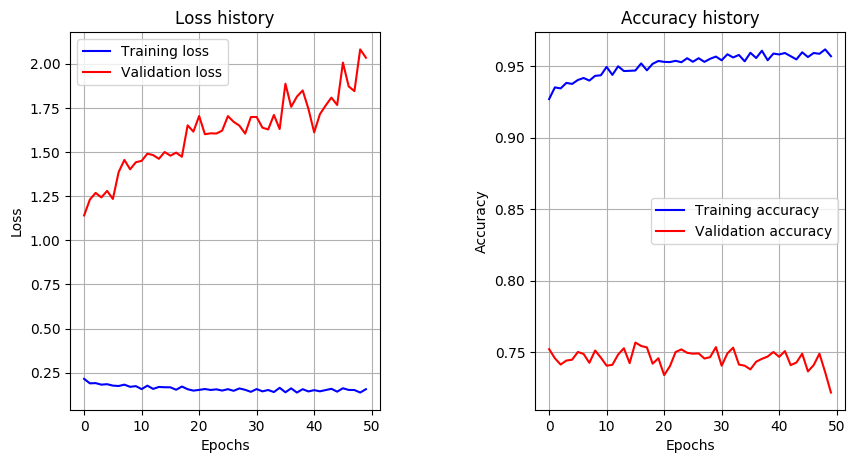

In [10]:
plot_history(history)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1_1 (Conv2D)             (None, 32, 32, 32)        896       
_________________________________________________________________
conv1_2 (Conv2D)             (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pool1 (MaxPooling2D)     (None, 15, 15, 32)        0         
_________________________________________________________________
conv2_1 (Conv2D)             (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2_2 (Conv2D)             (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pool2 (MaxPooling2D)     (None, 6, 6, 64)          0         
_________________________________________________________________
conv3_1 (Conv2D)             (None, 6, 6, 128)         73856     
__________

50000/50000 [==============================] - 11s 219us/step - loss: 0.1267 - acc: 0.9662 - val_loss: 2.4342 - val_acc: 0.7006
Epoch 47/50
50000/50000 [==============================] - 11s 220us/step - loss: 0.1084 - acc: 0.9711 - val_loss: 2.2689 - val_acc: 0.7252
Epoch 48/50
50000/50000 [==============================] - 11s 223us/step - loss: 0.1380 - acc: 0.9650 - val_loss: 2.1829 - val_acc: 0.7310
Epoch 49/50
50000/50000 [==============================] - 11s 220us/step - loss: 0.1150 - acc: 0.9696 - val_loss: 2.2301 - val_acc: 0.7226
Epoch 50/50
50000/50000 [==============================] - 12s 231us/step - loss: 0.1272 - acc: 0.9667 - val_loss: 2.2279 - val_acc: 0.7204


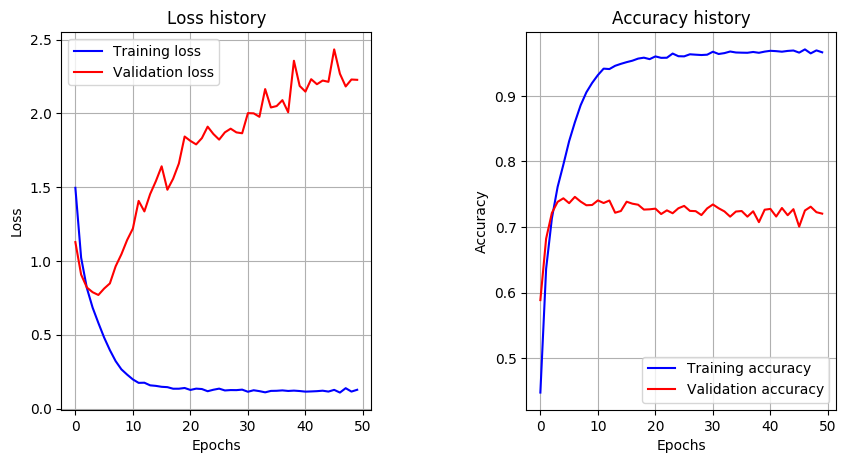

In [11]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu', name='conv1_1',
                        input_shape=(img_height, img_width, 3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu', name='conv1_2'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), name='max_pool1'))

model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu', name='conv2_1'))
model.add(layers.Conv2D(64, (3, 3), activation='relu', name='conv2_2'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), name='max_pool2'))

model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu', name='conv3_1'))
model.add(layers.Conv2D(128, (3, 3), activation='relu', name='conv3_2'))
#model.add(layers.MaxPooling2D(pool_size=(1, 1), name='max_pool3'))

model.add(layers.Flatten(name='flatten'))
model.add(layers.Dense(512, activation='relu', name='fc3'))
model.add(layers.Dense(num_classes, activation='softmax', name='fc4'))
model.summary()

batch_size = 32
epochs = 50

model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy'])

history = model.fit(x_train, y_train, 
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(x_val, y_val))

plot_history(history)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1_1 (Conv2D)             (None, 32, 32, 32)        896       
_________________________________________________________________
conv1_2 (Conv2D)             (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pool1 (MaxPooling2D)     (None, 15, 15, 32)        0         
_________________________________________________________________
conv2_1 (Conv2D)             (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2_2 (Conv2D)             (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pool2 (MaxPooling2D)     (None, 6, 6, 64)          0         
_________________________________________________________________
conv3_1 (Conv2D)             (None, 6, 6, 32)          18464     
__________

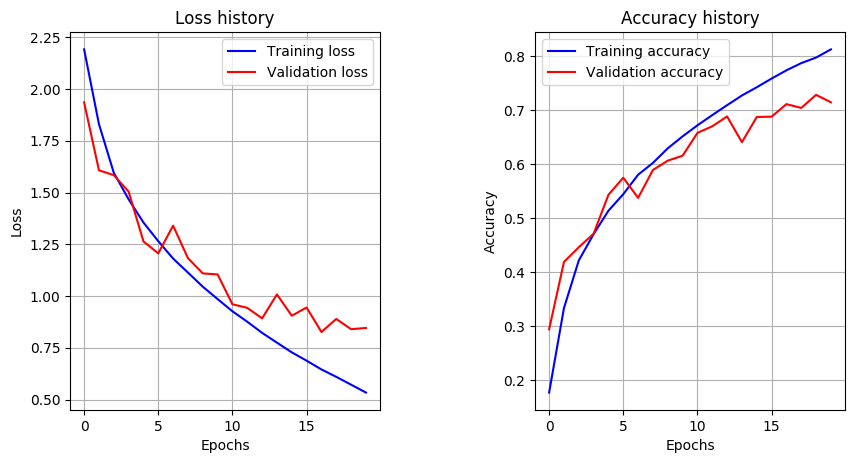

In [15]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu', name='conv1_1',
                        input_shape=(img_height, img_width, 3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu', name='conv1_2'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), name='max_pool1'))

model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu', name='conv2_1'))
model.add(layers.Conv2D(64, (3, 3), activation='relu', name='conv2_2'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), name='max_pool2'))

model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu', name='conv3_1'))
model.add(layers.Conv2D(32, (3, 3), activation='relu', name='conv3_2'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), name='max_pool3'))

model.add(layers.Flatten(name='flatten'))
model.add(layers.Dense(1024, activation='relu', name='fc3'))
model.add(layers.Dense(512, activation='relu', name='fc4'))
model.add(layers.Dense(num_classes, activation='softmax', name='fc5'))
model.summary()

batch_size = 32
epochs = 20

model.compile(
    loss='categorical_crossentropy', 
    optimizer='sgd', 
    metrics=['accuracy'])

history = model.fit(x_train, y_train, 
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(x_val, y_val))

plot_history(history)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1_1 (Conv2D)             (None, 32, 32, 32)        896       
_________________________________________________________________
conv1_2 (Conv2D)             (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pool1 (MaxPooling2D)     (None, 15, 15, 32)        0         
_________________________________________________________________
conv2_1 (Conv2D)             (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2_2 (Conv2D)             (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pool2 (MaxPooling2D)     (None, 6, 6, 64)          0         
_________________________________________________________________
conv3_1 (Conv2D)             (None, 6, 6, 32)          18464     
__________

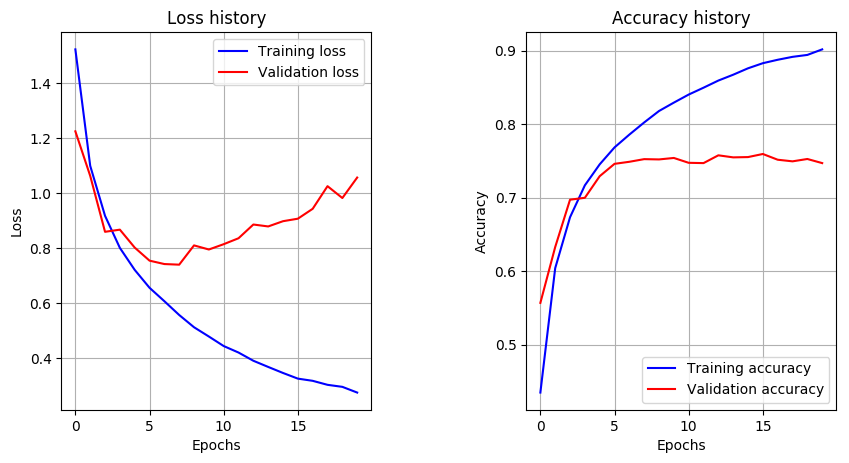

In [16]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu', name='conv1_1',
                        input_shape=(img_height, img_width, 3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu', name='conv1_2'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), name='max_pool1'))

model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu', name='conv2_1'))
model.add(layers.Conv2D(64, (3, 3), activation='relu', name='conv2_2'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), name='max_pool2'))

model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu', name='conv3_1'))
model.add(layers.Conv2D(32, (3, 3), activation='relu', name='conv3_2'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), name='max_pool3'))

model.add(layers.Flatten(name='flatten'))
model.add(layers.Dense(1024, activation='relu', name='fc3'))
model.add(layers.Dense(512, activation='relu', name='fc4'))
model.add(layers.Dense(num_classes, activation='softmax', name='fc5'))
model.summary()

batch_size = 32
epochs = 20

model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy'])

history = model.fit(x_train, y_train, 
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(x_val, y_val))

plot_history(history)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1_1 (Conv2D)             (None, 32, 32, 32)        896       
_________________________________________________________________
conv1_2 (Conv2D)             (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pool1 (MaxPooling2D)     (None, 15, 15, 32)        0         
_________________________________________________________________
conv2_1 (Conv2D)             (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2_2 (Conv2D)             (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pool2 (MaxPooling2D)     (None, 6, 6, 64)          0         
_________________________________________________________________
conv3_1 (Conv2D)             (None, 6, 6, 32)          18464     
__________

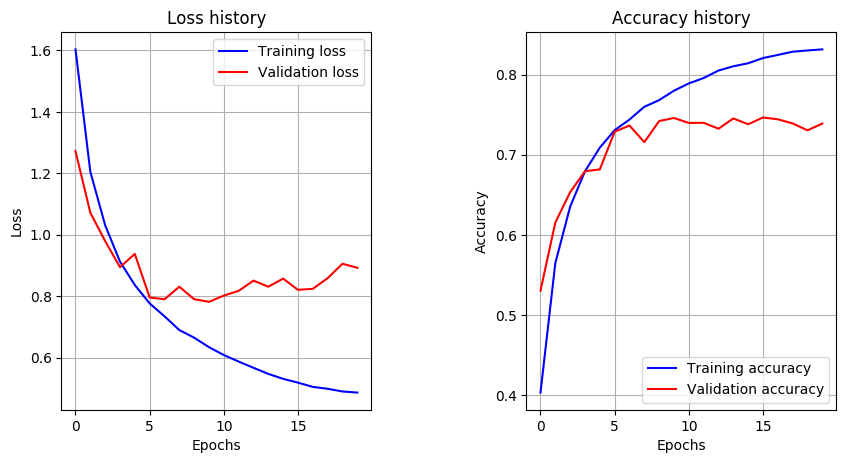

In [17]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu', name='conv1_1',
                        input_shape=(img_height, img_width, 3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu', name='conv1_2'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), name='max_pool1'))

model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu', name='conv2_1'))
model.add(layers.Conv2D(64, (3, 3), activation='relu', name='conv2_2'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), name='max_pool2'))

model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu', name='conv3_1'))
model.add(layers.Conv2D(32, (3, 3), activation='relu', name='conv3_2'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), name='max_pool3'))

model.add(layers.Flatten(name='flatten'))
model.add(layers.Dense(1024, activation='relu', name='fc3'))
model.add(layers.Dropout(0.25, name='dropout3'))
model.add(layers.Dense(512, activation='relu', name='fc4'))
model.add(layers.Dropout(0.5, name='dropout4'))
model.add(layers.Dense(num_classes, activation='softmax', name='fc5'))
model.summary()

batch_size = 32
epochs = 20

model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy'])

history = model.fit(x_train, y_train, 
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(x_val, y_val))

plot_history(history)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1_1 (Conv2D)             (None, 32, 32, 32)        896       
_________________________________________________________________
conv1_2 (Conv2D)             (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pool1 (MaxPooling2D)     (None, 15, 15, 32)        0         
_________________________________________________________________
conv2_1 (Conv2D)             (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2_2 (Conv2D)             (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pool2 (MaxPooling2D)     (None, 6, 6, 64)          0         
_________________________________________________________________
conv3_1 (Conv2D)             (None, 6, 6, 32)          18464     
__________

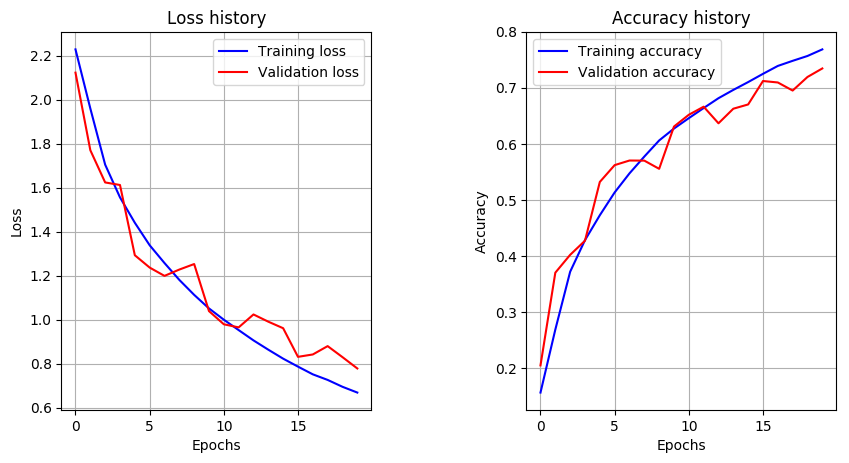

In [18]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu', name='conv1_1',
                        input_shape=(img_height, img_width, 3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu', name='conv1_2'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), name='max_pool1'))

model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu', name='conv2_1'))
model.add(layers.Conv2D(64, (3, 3), activation='relu', name='conv2_2'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), name='max_pool2'))

model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu', name='conv3_1'))
model.add(layers.Conv2D(32, (3, 3), activation='relu', name='conv3_2'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), name='max_pool3'))

model.add(layers.Flatten(name='flatten'))
model.add(layers.Dense(1024, activation='relu', name='fc3'))
model.add(layers.Dropout(0.25, name='dropout3'))
model.add(layers.Dense(512, activation='relu', name='fc4'))
model.add(layers.Dropout(0.5, name='dropout4'))
model.add(layers.Dense(num_classes, activation='softmax', name='fc5'))
model.summary()

batch_size = 32
epochs = 20

model.compile(
    loss='categorical_crossentropy', 
    optimizer='sgd', 
    metrics=['accuracy'])

history = model.fit(x_train, y_train, 
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(x_val, y_val))

plot_history(history)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1_1 (Conv2D)             (None, 32, 32, 32)        3488      
_________________________________________________________________
conv1_2 (Conv2D)             (None, 27, 27, 32)        36896     
_________________________________________________________________
conv2_1 (Conv2D)             (None, 27, 27, 64)        51264     
_________________________________________________________________
conv2_2 (Conv2D)             (None, 23, 23, 64)        102464    
_________________________________________________________________
conv3_1 (Conv2D)             (None, 23, 23, 128)       73856     
_________________________________________________________________
conv3_2 (Conv2D)             (None, 21, 21, 128)       147584    
_________________________________________________________________
conv4_1 (Conv2D)             (None, 21, 21, 256)       295168    
__________

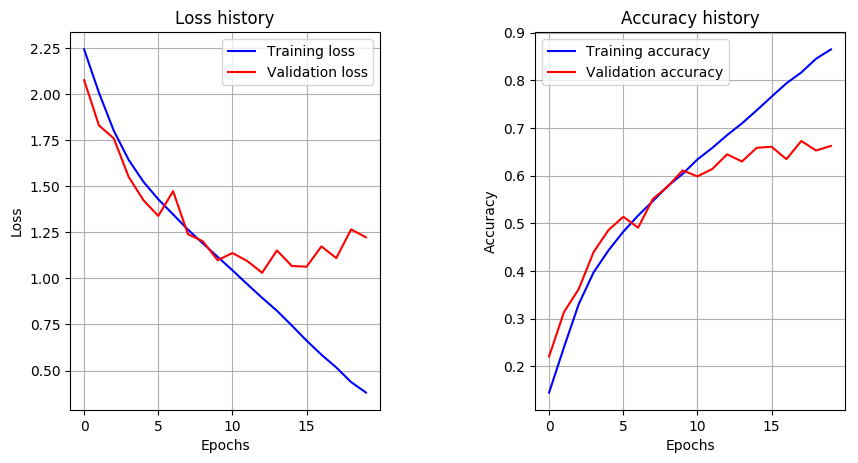

In [31]:
model = models.Sequential()
model.add(layers.Conv2D(32, (6, 6), padding='same', activation='relu', name='conv1_1',
                        input_shape=(img_height, img_width, 3)))
model.add(layers.Conv2D(32, (6, 6), activation='relu', name='conv1_2'))
#model.add(layers.MaxPooling2D(pool_size=(2, 2), name='max_pool1'))

model.add(layers.Conv2D(64, (5, 5), padding='same', activation='relu', name='conv2_1'))
model.add(layers.Conv2D(64, (5, 5), activation='relu', name='conv2_2'))
#model.add(layers.MaxPooling2D(pool_size=(2, 2), name='max_pool2'))

model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu', name='conv3_1'))
model.add(layers.Conv2D(128, (3, 3), activation='relu', name='conv3_2'))
#model.add(layers.MaxPooling2D(pool_size=(2, 2), name='max_pool3'))
#model.summary()

model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu', name='conv4_1'))
model.add(layers.Conv2D(256, (3, 3), activation='relu', name='conv4_2'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), name='max_pool4'))

model.add(layers.Conv2D(512, (5, 5), padding='same', activation='relu', name='conv5_1'))
model.add(layers.Conv2D(512, (5, 5), activation='relu', name='conv5_2'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), name='max_pool5'))

model.add(layers.Flatten(name='flatten'))
model.add(layers.Dense(512, activation='relu', name='fc3'))
model.add(layers.Dropout(0.1, name='dropout3'))
model.add(layers.Dense(1024, activation='elu', name='fc4'))
model.add(layers.Dropout(0.2, name='dropout4'))
model.add(layers.Dense(2048, activation='relu', name='fc5'))
model.add(layers.Dropout(0.3, name='dropout5'))
model.add(layers.Dense(1024, activation='elu', name='fc6'))
model.add(layers.Dropout(0.4, name='dropout6'))
model.add(layers.Dense(512, activation='relu', name='fc7'))
model.add(layers.Dropout(0.5, name='dropout7'))
model.add(layers.Dense(num_classes, activation='softmax', name='fc8'))
model.summary()

batch_size = 32
epochs = 20

model.compile(
    loss='categorical_crossentropy', 
    optimizer='sgd', 
    metrics=['accuracy'])

history = model.fit(x_train, y_train, 
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(x_val, y_val))

plot_history(history)

In [40]:
from keras import preprocessing

datagen = preprocessing.image.ImageDataGenerator(
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True)  # randomly flip images
datagen.fit(x_train)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1_1 (Conv2D)             (None, 32, 32, 32)        2432      
_________________________________________________________________
conv1_2 (Conv2D)             (None, 28, 28, 32)        25632     
_________________________________________________________________
conv2_1 (Conv2D)             (None, 28, 28, 64)        51264     
_________________________________________________________________
conv2_2 (Conv2D)             (None, 24, 24, 64)        102464    
_________________________________________________________________
conv3_1 (Conv2D)             (None, 24, 24, 128)       204928    
_________________________________________________________________
conv3_2 (Conv2D)             (None, 20, 20, 128)       409728    
_________________________________________________________________
max_pool2 (MaxPooling2D)     (None, 10, 10, 128)       0         
__________

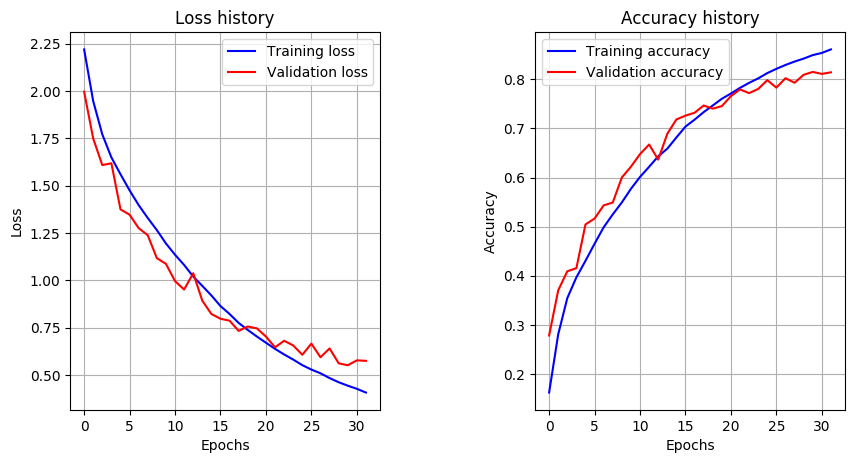

In [42]:
model = models.Sequential()
model.add(layers.Conv2D(32, (5, 5), padding='same', activation='relu', name='conv1_1',
                        input_shape=(img_height, img_width, 3)))
model.add(layers.Conv2D(32, (5, 5), activation='relu', name='conv1_2'))

model.add(layers.Conv2D(64, (5, 5), padding='same', activation='relu', name='conv2_1'))
model.add(layers.Conv2D(64, (5, 5), activation='relu', name='conv2_2'))

#model.add(layers.MaxPooling2D(pool_size=(2, 2), name='max_pool1'))

model.add(layers.Conv2D(128, (5, 5), padding='same', activation='relu', name='conv3_1'))
model.add(layers.Conv2D(128, (5, 5), activation='relu', name='conv3_2'))

model.add(layers.MaxPooling2D(pool_size=(2, 2), name='max_pool2'))

model.add(layers.Conv2D(256, (5, 5), padding='same', activation='relu', name='conv4_1'))
model.add(layers.Conv2D(256, (5, 5), activation='relu', name='conv4_2'))

model.add(layers.Conv2D(512, (3, 3), padding='same', activation='relu', name='conv5_1'))
model.add(layers.Conv2D(512, (3, 3), activation='relu', name='conv5_2'))

model.add(layers.MaxPooling2D(pool_size=(2, 2), name='max_pool3'))

model.add(layers.Flatten(name='flatten'))
model.add(layers.Dense(256, activation='relu', name='fc3'))
model.add(layers.Dropout(0.2, name='dropout3'))
model.add(layers.Dense(512, activation='relu', name='fc4'))
model.add(layers.Dropout(0.5, name='dropout4'))
model.add(layers.Dense(num_classes, activation='softmax', name='fc5'))
model.summary()

batch_size = 32
epochs = 32

model.compile(
    loss='categorical_crossentropy', 
    optimizer='sgd', 
    metrics=['accuracy'])

history = model.fit_generator(
    datagen.flow(x_train, y_train, batch_size=batch_size),
    epochs=epochs,
    validation_data=(x_val, y_val))

plot_history(history)